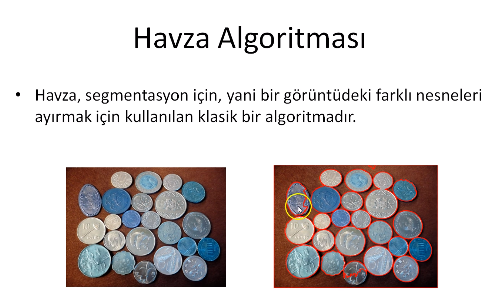    

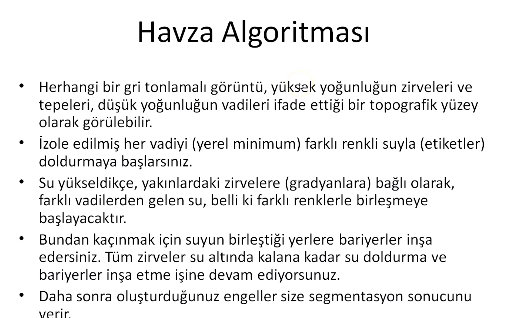

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

C:\Users\APO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\APO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
# ana görüntüyü içe aktar

coin = cv2.imread("coins.jpg") 

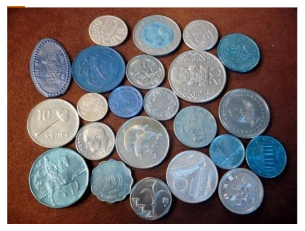

In [3]:
plt.figure()
plt.imshow(coin,cmap = "gray")
plt.axis("off");

In [4]:
# lpf : blurring
coin_blur = cv2.medianBlur(coin,13)

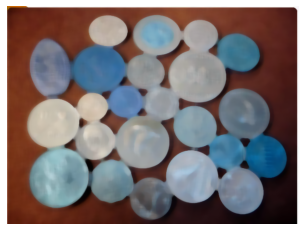

In [5]:
plt.figure()
plt.imshow(coin_blur,cmap = "gray")
plt.axis("off");

In [6]:
#grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)


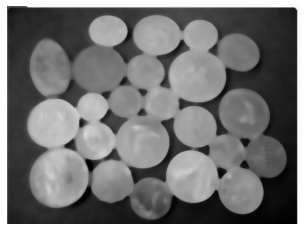

In [7]:
plt.figure()
plt.imshow(coin_gray,cmap = "gray")
plt.axis("off");

# THRESHOLD

Giriş olarak verilen görüntüyü ikili görüntüye çevirmek için kullanılan bir yöntemdir.

İkili görüntü (binary), görüntünün siyah ve beyaz olarak tanımlanmasıdır.

Morfolojik operatörler gibi görüntü üzerindeki gürültüleri azaltmak veya nesne belirlemek gibi farklı amaçlar için kullanılır.

Giriş olarak verilen görüntü üzerinde uygulanan thresholding tipine bağlı olarak, pikselleri verilen eşik değerine göre siyah ya da beyaz olarak günceller.

Eğer piksel değeri bir eşik değerden büyükse, bir değere (beyaz olabilir), başka bir değere (siyah olabilir) atanır.

Kullanılan işlev cv2.threshold'dır.

İlk argüman gri tonlamalı olması gereken kaynak görüntüsüdür.Yani uygulamaya başlarken ilk yapılan görseli gri tonlamalı görüntüye çevirmektir.

İkinci argüman, piksel değerlerini sınıflandırmak için kullanılan eşik değeridir.

Üçüncü argüman, piksel değeri eşik değerden daha büyükse (bazen daha azsa) verilecek değeri temsil eden maxVal'dir.

OpenCV farklı eşikleme stilleri sağlar ve fonksiyonun dördüncü parametresi tarafından karar verilir.

In [8]:
# THRESHOLD
ret,coin_thresh = cv2.threshold(coin_gray,75,255,cv2.THRESH_BINARY) # 75,255 THRES. DEĞERLERİM

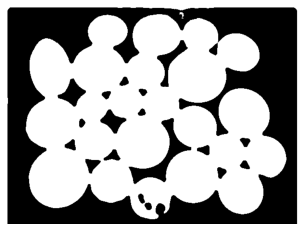

In [9]:
plt.figure()
plt.imshow(coin_thresh,cmap = "gray")
plt.axis("off");

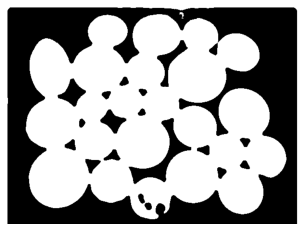

In [10]:
# THRESHOLD
ret,coin_thresh = cv2.threshold(coin_gray,75,255,cv2.THRESH_BINARY) # 75,255 THRES. DEĞERLERİM

plt.figure()
plt.imshow(coin_thresh,cmap = "gray")
plt.axis("off");#grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)


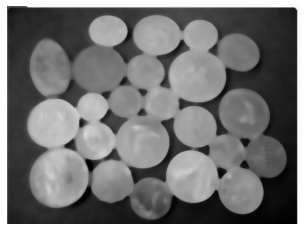

In [11]:
plt.figure()
plt.imshow(coin_gray,cmap = "gray")
plt.axis("off");

In [12]:
# Kontur

contours, hierarchy = cv2.findContours(coin_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

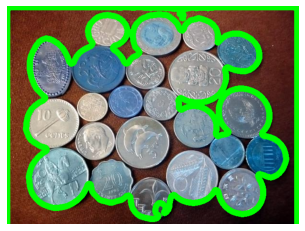

In [13]:
# çizdirelim

for i  in range(len(contours)):
    if hierarchy[0][i][3] == -1 : # external corner
        cv2.drawContours(coin, contours, i, (0,255,0),11) 

        
        
plt.figure()
plt.imshow(coin)
plt.axis("off");        
        

In [14]:
# görüldüğü üzere tam manasıyla ayıramamış , tek 1 segmente var 
# şimdi bu problemleri ortadan kaldıralım 

# WATERSHED

##teori
Herhangi bir gri tonlamalı görüntü, yüksek yoğunluğun tepeleri ve tepeleri, düşük yoğunluğun ise vadileri gösterdiği bir topografik yüzey olarak görülebilir. İzole edilmiş her vadiyi (yerel minimum) farklı renkli su (etiketler) ile doldurmaya başlarsınız. Su yükseldikçe, yakınlardaki tepelere (gradyanlara) bağlı olarak, farklı vadilerden gelen, belli ki farklı renklerde sular birleşmeye başlayacaktır. Bunu önlemek için suyun birleştiği yerlere bariyerler örersiniz. Tüm tepeler sular altında kalana kadar su doldurma ve bariyerler inşa etme işine devam ediyorsun. Ardından oluşturduğunuz engeller size segmentasyon sonucunu verir. Bu, havzanın arkasındaki “felsefe”dir. Bazı animasyonlar yardımıyla anlamak için CMM web sayfasını watershed'de ziyaret edebilirsiniz .

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

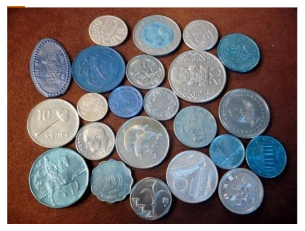

In [15]:
# içeri aktar 

coin = cv2.imread("coins.jpg") 
plt.figure()
plt.imshow(coin)
plt.axis("off");

In [16]:
# lpf : blurring
coin_blur = cv2.medianBlur(coin,13)

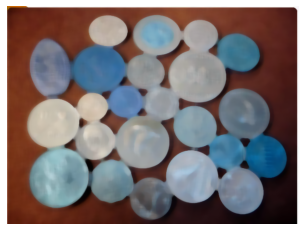

In [17]:
plt.figure()
plt.imshow(coin_blur,cmap = "gray")
plt.axis("off");

In [18]:
#grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)


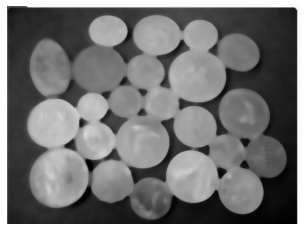

In [19]:
plt.figure()
plt.imshow(coin_gray,cmap = "gray")
plt.axis("off");

In [20]:
# binary THRESHOLD
ret,coin_thresh = cv2.threshold(coin_gray,65,255,cv2.THRESH_BINARY) # 75,255 THRES. DEĞERLERİM

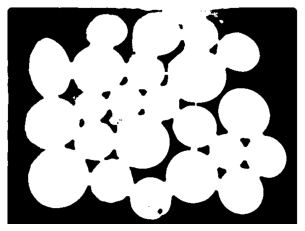

In [21]:
plt.figure()
plt.imshow(coin_thresh,cmap = "gray")
plt.axis("off");

nesneler arasında köprüler oluşmuş . ben bunların boyutunu küçültrsem bunlar birbirinden ayrılır.

https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

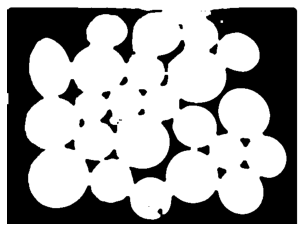

In [22]:
#açılma ( genişleme)
kernel = np.ones((3,3),np.uint8) 
opening = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations = 2) 


plt.figure()
plt.imshow(opening,cmap = "gray")
plt.axis("off");

az da olsa düzelme var noiselarda özellikle 
şimdi  distance ile daha fazla düzeltme sağlayacağım

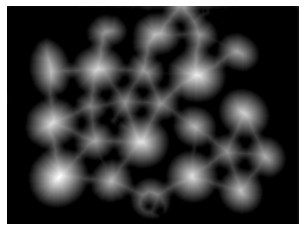

In [23]:
# nesneler arası mesafeyi bulalım

# Perform the distance transform algorithm
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3) # oklid distance 
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it

plt.figure()
plt.imshow(dist_transform,cmap = "gray")
plt.axis("off");

# öndeki resmi bulmak için nesneleri küçültüyorum

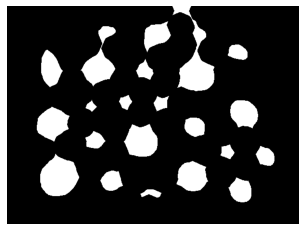

In [24]:
ret, sure_foreground = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)
                        
                                                # dist_transform.max() alt sınır
                                                    # 255 üst sınır
            
            
            
plt.figure()
plt.imshow(sure_foreground,cmap = "gray")
plt.axis("off");  

# cıkan sonucta gorulecegı uzere yuvarlakların merkezlerındeki max genlk(threshold) değeri
# eğer ben burdan max threshold değerni bulursam ve bunun %40 ını alırsam (tavsiye değer)
# burdaki köprülerden kurtulmuş olurum

adacıkları bulduk 

arka planı bulmak var sırada

# resmi (nesneleri) büyütüyorum



Erozyonun tam tersidir. Burada, çekirdeğin altındaki en az bir piksel '1' ise bir piksel öğesi '1'dir. Böylece görüntüdeki beyaz bölge artar veya ön plandaki nesnenin boyutu artar. Normalde gürültü giderme gibi durumlarda erozyonu genişleme takip eder. Çünkü erozyon beyaz sesleri ortadan kaldırır ama aynı zamanda nesnemizi de küçültür. Böylece genişletiyoruz. Gürültü gittiği için geri gelmeyecekler ama nesne alanımız artıyor. Bir nesnenin kırık parçalarının birleştirilmesinde de yararlıdır.

https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [25]:
# sure background area
sure_backround = cv2.dilate(opening,kernel,iterations=2)
sure_foreground = np.uint8(sure_foreground)

In [26]:
# Finding unknown region

unknown = cv2.subtract(sure_backround,sure_foreground)

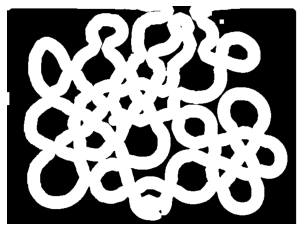

In [27]:
plt.figure()
plt.imshow(unknown,cmap = "gray")
plt.axis("off");  

### adacıklarımın etrafındaki sınırları da belirledim 

In [28]:
# baglantı : artık arasındaki bağlantıyı yapıp resmimi daha belirgin hale getirebilirim

In [29]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_foreground) # ön planda fg olacak


# Add one to all labels so that sure background is not 0, but 1
markers = markers+1   

# Now, mark the region of unknown with zero
markers[unknown==255] = 0 #filtre yapıyorum , 255 beyazdı bunları siyah yapıyorum

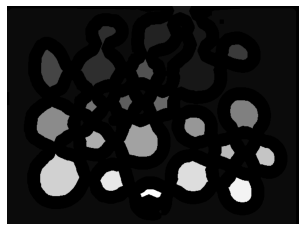

In [30]:
plt.figure()
plt.imshow(markers,cmap = "gray")
plt.axis("off");  

evet, tam manası ile adacıklarım ortaya cıktı

In [31]:
# artık havza algoritması ile bunları segmente edebilirim

In [33]:
#Now our marker is ready. 
#It is time for final step, apply watershed. 
#Then marker image will be modified. The boundary region will be marked with -1.

markers = cv2.watershed(coin,markers)
coin[markers == -1] = [255,0,0]

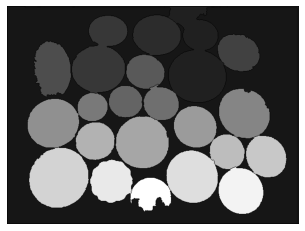

In [34]:
plt.figure()
plt.imshow(markers,cmap = "gray")
plt.axis("off");

artık adacıklarımın tam manası ile ayrıldıgını gördüm

şimdi kontur uygulayabilirim çünkü birbirinden tam manası ile ayrıldı artık 

In [35]:
# Kontur

contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

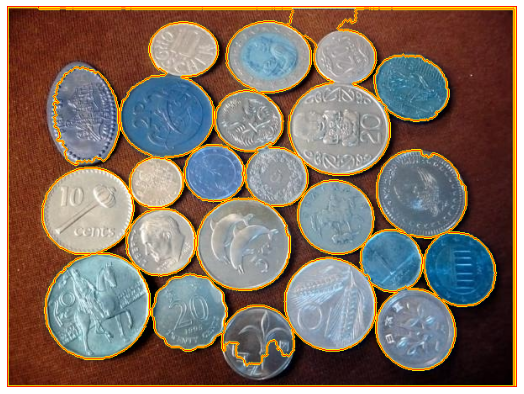

In [37]:
# çizdirelim

for i  in range(len(contours)):
    if hierarchy[0][i][3] == -1 : # external corner
        cv2.drawContours(coin, contours, i, (255,255,0),1) 

        
        
plt.figure(figsize=(12,7))
plt.imshow(coin)
plt.axis("off");        
        

https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html